In [109]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt



In [184]:
df=pd.read_csv('NO2_data.csv',parse_dates=['month'],header=1) #just NOx data

ValueError: 'month' is not in list

In [121]:
df.head()

,Date,Time,NO,NO2,NOX
0,NaN,NaN,ppb,ppb,ppb
1,1/1/18,12:00 AM,NaN,NaN,NaN
2,1/2/18,12:00 AM,NaN,NaN,NaN
3,1/3/18,12:00 AM,NaN,NaN,NaN
4,1/4/18,12:00 AM,NaN,NaN,NaN


In [113]:
df2=pd.read_csv('all_contaminants_data.csv', header=1) #data contains all contaminants

In [101]:
df2.head()

,Date,Time,Wind Spd S,Wind Dir S,Temp Amb 10m,NO,NO2,NOX,WAQA_CO,BC_633,UV_633,BAM_PM25
0,NaN,NaN,MPH,Deg,DegF,ppb,ppb,ppb,ppm,ug/m^3 (s),ug/m^3 (s),ug/m^3
1,1/1/18,12:00 AM,2.9,29.8,36.6,NaN,NaN,NaN,0.366,0.7,1.6,9.7
2,1/2/18,12:00 AM,2.6,30.5,39.3,NaN,NaN,NaN,0.496,1.2,1.9,8
3,1/3/18,12:00 AM,2.2,39,40.9,NaN,NaN,NaN,0.588,1.4,2.3,9.7
4,1/4/18,12:00 AM,1.9,133.9,42.9,NaN,NaN,NaN,1.043,4.7,6.6,21


In [116]:
df3 = df2[["Date","NO2","BAM_PM25"]]  #selected columns from df2

In [115]:
df3.tail(20)

,Date,NO2,BAM_PM25
818,3/28/20,7.8,1.3
819,3/29/20,7.9,0.9
820,3/30/20,13.6,2.7
821,3/31/20,14.2,2.8
822,4/1/20,14.6,3.5
823,4/2/20,13.3,4.4
824,4/3/20,10.2,2.3
825,4/4/20,9.3,3
826,4/5/20,6.7,3.3
827,4/6/20,NaN,NaN


In [ ]:
df3.drop(df3.index[0],inplace=True)

In [54]:
df4=pd.read_csv('contam_Beacon_data.csv', header=1)
df4

,Date,Time,Trace SO2,Trace NO,Trace NOy,Trace NOy-NO,WAQA_CO,O3,RTEMP,Wind Spd S,Wind Dir S,Temp Amb,Amb Press,Rain,RH,BAM_PM25,NO2_CAPS
0,NaN,NaN,ppb,ppb,ppb,ppb,ppm,ppm,DegF,MPH,Deg,DegF,mb,mm,%,ug/m^3,ppb
1,2/1/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.007,67,3.5,NaN,38.8,NaN,NaN,NaN,NaN,NaN
2,2/2/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.002,67,2.7,NaN,36.9,NaN,NaN,NaN,NaN,NaN
3,2/3/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.004,67,4.1,NaN,38.8,NaN,NaN,NaN,NaN,NaN
4,2/4/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.002,74,2.3,NaN,44,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,MaxTime,NaN,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00
4821,Avg,NaN,0.99,7.1,19.4,12.1,0.222,0.018,74,3.9,162.7,52.1,1004,337127,77,3.4,10.562
4822,Num,NaN,3968,4701,4701,4701,527,4602,4769,4453,4245,4532,3531,2328,3959,94,716
4823,Data[%],NaN,82,97,97,97,10,95,99,92,88,94,73,48,82,1,14


In [74]:
df_NO2_raw=df4[['Date','NO2_CAPS']]
df_NO2_raw

,Date,NO2_CAPS
0,NaN,ppb
1,2/1/07,NaN
2,2/2/07,NaN
3,2/3/07,NaN
4,2/4/07,NaN
...,...,...
4820,MaxTime,12:00
4821,Avg,10.562
4822,Num,716
4823,Data[%],14


In [68]:
df_NO2.tail(20)

,Date,NO2_CAPS
4805,3/28/20,4.458
4806,3/29/20,1.954
4807,3/30/20,3.639
4808,3/31/20,4.481
4809,4/1/20,6.582
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401
4813,4/5/20,4.253
4814,4/6/20,NaN


In [76]:
df_NO2=df_NO2_raw.iloc[:4815]
df_NO2

,Date,NO2_CAPS
0,NaN,ppb
1,2/1/07,NaN
2,2/2/07,NaN
3,2/3/07,NaN
4,2/4/07,NaN
...,...,...
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401
4813,4/5/20,4.253


In [77]:
msk=df_NO2['NO2_CAPS'].isnull()

In [83]:
df_NO2_no_nulls=df_NO2[~msk]
df_NO2_no_nulls

,Date,NO2_CAPS
0,NaN,ppb
4089,4/12/18,5.117
4090,4/13/18,6.056
4091,4/14/18,10.857
4092,4/15/18,6.631
...,...,...
4809,4/1/20,6.582
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401


In [90]:
df_NO2_totally_cleaned = df_NO2_no_nulls.loc[4089:]
df_NO2_totally_cleaned

,Date,NO2_CAPS
4089,4/12/18,5.117
4090,4/13/18,6.056
4091,4/14/18,10.857
4092,4/15/18,6.631
4093,4/16/18,5.504
...,...,...
4809,4/1/20,6.582
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401


In [146]:
df_NO2_totally_cleaned['Date'].apply(pd.to_datetime).copy()
#df_NO2_totally_cleaned['Date'].apply(lambda date: pd.to_datetime(date),result_type='broadcast')


4089   2018-04-12
4090   2018-04-13
4091   2018-04-14
4092   2018-04-15
4093   2018-04-16
          ...    
4809   2020-04-01
4810   2020-04-02
4811   2020-04-03
4812   2020-04-04
4813   2020-04-05
Name: Date, Length: 716, dtype: datetime64[ns]

In [190]:
df_NO2_totally_cleaned.Date.dt.month

4089    4
4090    4
4091    4
4092    4
4093    4
       ..
4809    4
4810    4
4811    4
4812    4
4813    4
Name: Date, Length: 716, dtype: int64

In [149]:
df_NO2_totally_cleaned

,Date,NO2_CAPS
4089,2018-04-12,5.117
4090,2018-04-13,6.056
4091,2018-04-14,10.857
4092,2018-04-15,6.631
4093,2018-04-16,5.504
...,...,...
4809,2020-04-01,6.582
4810,2020-04-02,6.52
4811,2020-04-03,3.149
4812,2020-04-04,4.401


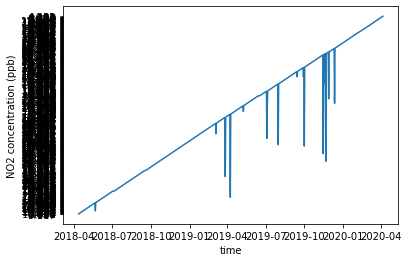

In [177]:
fig,ax = plt.subplots()
ax.set_xlabel('time')
ax.set_ylabel('NO2 concentration (ppb)')
ax.plot('Date','NO2_CAPS',data=df_NO2_totally_cleaned)

In [196]:
df_NO2_totally_cleaned.groupby(df_NO2_totally_cleaned.Date.dt.month)['NO2_CAPS'].mean()
#df_NO2_totally_cleaned['Date'].dt.month


DataError: No numeric types to aggregate

In [153]:
result = df_NO2_totally_cleaned['Date'].dt.month


AttributeError: 'Series' object has no attribute 'info'

In [42]:
df5.drop(df5.index[0], inplace=True)

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 1 to 4825
Data columns (total 2 columns):
date        4824 non-null object
NO2-conc    727 non-null object
dtypes: object(2)
memory usage: 113.1+ KB


In [47]:
df5['date'].apply(lambda date: pd.to_datetime(date))

ValueError: ('Unknown string format:', 'Minimum')

KeyError: 'Date'

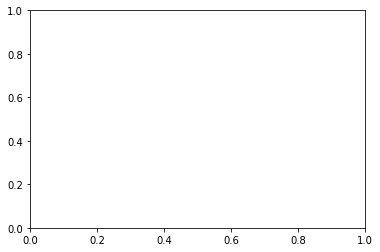

In [34]:
fig,ax = plt.subplots()

ax.scatter(x=df['Date'],y=df['NO2-conc'])